In [1]:
import polars as pl                         # Fast dataframes for financial data
import numpy as np                          # Numerical computing library
from datetime import datetime, timedelta    # Date and time operations
import random


# Machine learning libraries  
import torch                                # PyTorch framework
import torch.nn as nn                       # Neural network modules
import torch.optim as optim                 # Optimization algorithms                          


# Visualization and 
import altair as alt                        # Interactive visualization library
from xrp_model import research, binance, models

In [2]:
sym ='XRPUSDT'
forecast_horizon = 1

In [3]:
start_date = datetime(2023, 2, 11, 0, 0)
end_date   = datetime(2026, 2, 11, 0, 0)

In [ ]:
binance.download_date_range(sym, start_date, end_date)

In [4]:
time_interval = '8h'
ts = research.load_ohlc_timeseries_range(sym, time_interval, start_date, end_date)

Loading XRPUSDT: 100%|██████████| 1097/1097 [00:28<00:00, 38.60day/s]


In [5]:
no_lags = 6
ts = research.add_log_return_features(ts, 'close', forecast_horizon, max_no_lags=no_lags)

In [6]:
target = 'close_log_return'

In [7]:
feature_pool = [f'{target}_lag_{i}' for i in range(1, no_lags + 1)]

In [8]:
research.set_seed(99)

In [9]:
annualized_rate = research.sharpe_annualization_factor(time_interval, 365, 24)

In [11]:
pl.Config.set_fmt_str_lengths(200)

polars.config.Config

In [12]:
research.benchmark_linear_models(ts.drop_nulls(), target, feature_pool, annualized_rate, max_no_features=5, no_epochs=200, loss=nn.MSELoss(), test_size=0.25)

features,target,no_trades,win_rate,avg_win,avg_loss,best_trade,worst_trade,ev,std,total_log_return,compound_return,max_drawdown,equity_trough,equity_peak,sharpe,weights,biases
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_5""","""close_log_return""",821,0.499391,0.016165,-0.012445,0.157585,-0.076803,0.001843,0.020714,1.512917,4.539954,-0.341836,-0.022825,1.625543,2.943779,"""[ 0.03134654 0.05952642 -0.06342151 0.02456243]""","""0.0007475657621398568"""
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_5,close_log_return_lag_6""","""close_log_return""",821,0.498173,0.015756,-0.01286,0.157585,-0.076803,0.001396,0.020749,1.145801,3.144959,-0.303334,-0.197163,1.265954,2.225701,"""[ 0.03051166 0.05992945 -0.06166928 0.02261927 0.02987845]""","""0.0007277351687662303"""
"""close_log_return_lag_1,close_log_return_lag_3,close_log_return_lag_5""","""close_log_return""",821,0.503045,0.015596,-0.012994,0.157585,-0.099587,0.001388,0.02075,1.139341,3.124708,-0.495081,-0.121647,1.332671,2.213096,"""[ 0.03095321 -0.06114309 0.02202757]""","""0.0007930193096399307"""
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4,close_log_return_lag_5""","""close_log_return""",821,0.485993,0.015917,-0.012777,0.157585,-0.062058,0.001169,0.020763,0.959354,2.61001,-0.407956,-0.035502,1.079508,1.86227,"""[ 0.02720439 0.06290077 -0.06110439 -0.04126434 0.02674682]""","""0.000773525214754045"""
"""close_log_return_lag_1,close_log_return_lag_3,close_log_return_lag_5,close_log_return_lag_6""","""close_log_return""",821,0.498173,0.015509,-0.013106,0.157585,-0.099587,0.001149,0.020765,0.943669,2.569391,-0.323795,-0.161443,0.990755,1.831729,"""[ 0.0302684 -0.05921075 0.02105919 0.03346564]""","""0.0007684847805649042"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""close_log_return_lag_1,close_log_return_lag_6""","""close_log_return""",821,0.464068,0.014223,-0.014372,0.157585,-0.146504,-0.001102,0.020767,-0.904848,0.404603,-1.169492,-1.150193,0.019299,-1.756157,"""[0.02245517 0.0403351 ]""","""0.0007404841599054635"""
"""close_log_return_lag_4""","""close_log_return""",821,0.454324,0.014216,-0.014376,0.157585,-0.146504,-0.001386,0.02075,-1.13771,0.320552,-1.395493,-1.244797,0.150697,-2.209913,"""[-0.0390486]""","""0.0008183864410966635"""
"""close_log_return_lag_4,close_log_return_lag_6""","""close_log_return""",821,0.464068,0.013821,-0.01472,0.157585,-0.146504,-0.001475,0.020744,-1.211195,0.297841,-1.658374,-1.348666,0.309709,-2.353353,"""[-0.04411978 0.04237733]""","""0.0007937808986753225"""


In [14]:
class LinearModel(nn.Module):
    def __init__(self, input_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_features, 1)

    def forward(self, x):
        return self.linear(x)

In [15]:
input_features = 4

linear_model = LinearModel(input_features)

research.print_model_info(linear_model, "Linear Model")
research.total_model_params(linear_model)


Linear Model

Architecture:
  LinearModel(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

Parameter Count:
  Total parameters:      5
  Trainable parameters:  5



5

In [16]:
features = ['close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3','close_log_return_lag_5']

model = LinearModel(len(features))
model.apply(research.init_weights)
model_trades = research.learn_model_trades(ts.drop_nulls(), features, target, model, loss=nn.MSELoss())

research.plot_column(model_trades, 'equity_curve')

alt.Chart(...)

In [18]:
taker_fee = 0.00045

shape: (1, 3)
┌───────────┬────────────┬──────────┐
│ flip_rate ┆ mean_gross ┆ mean_net │
│ ---       ┆ ---        ┆ ---      │
│ f64       ┆ f32        ┆ f64      │
╞═══════════╪════════════╪══════════╡
│ 0.479903  ┆ 0.001843   ┆ 0.001411 │
└───────────┴────────────┴──────────┘


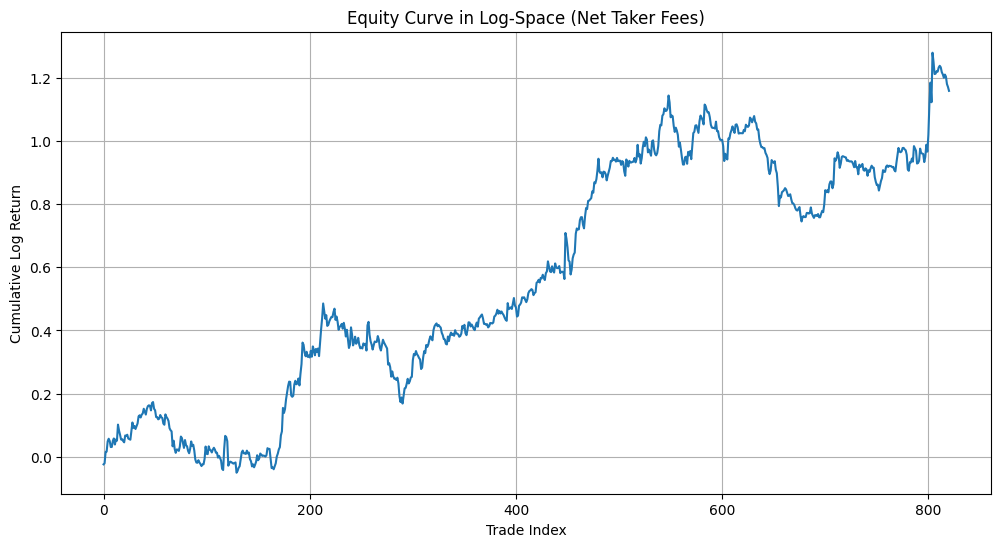

In [19]:
roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

model_trades = (
    model_trades
    .with_columns([
        pl.col("position").cast(pl.Int8).alias("pos"),
        pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev"),
    ])
    .with_columns([
        (pl.col("pos") != pl.col("pos_prev"))
        .fill_null(True)
        .alias("is_flip"),
    ])
    .with_columns([
        pl.when(pl.col("is_flip"))
          .then(pl.lit(roundtrip_fee_log))
          .otherwise(pl.lit(0.0))
          .alias("fee_log"),
    ])
    .with_columns([
        (pl.col("trade_log_return") + pl.col("fee_log"))
        .alias("trade_log_return_net_taker"),
    ])
    .with_columns([
        pl.col("trade_log_return_net_taker")
        .cum_sum()
        .alias("equity_curve_net_taker"),
    ])
)

# -------------------------
# 3) Sanity check
# -------------------------
print(
    model_trades.select([
        pl.col("is_flip").mean().alias("flip_rate"),
        pl.col("trade_log_return").mean().alias("mean_gross"),
        pl.col("trade_log_return_net_taker").mean().alias("mean_net"),
    ])
)

# -------------------------
# 4) Plot
# -------------------------
import matplotlib.pyplot as plt
import numpy as np

eq = model_trades["equity_curve_net_taker"].to_numpy()

plt.figure(figsize=(12,6))
plt.plot(eq)
plt.title("Equity Curve in Log-Space (Net Taker Fees)")
plt.xlabel("Trade Index")
plt.ylabel("Cumulative Log Return")
plt.grid(True)
plt.show()

In [20]:
r_net = model_trades["trade_log_return"].to_numpy()

N = len(r_net)
mean_r = r_net.mean()
std_r = r_net.std(ddof=1)

t_stat = mean_r / (std_r / np.sqrt(N))

print("----- GROSS PERFORMANCE -----")
print("N:", N)
print("Mean per bar:", mean_r)
print("Std per bar:", std_r)
print("t-stat:", t_stat)

----- GROSS PERFORMANCE -----
N: 821
Mean per bar: 0.0018427734
Std per bar: 0.020714467
t-stat: 2.548999455679184


In [21]:
bars_per_year = 3 * 365

ann_ret = mean_r * bars_per_year
ann_vol = std_r * np.sqrt(bars_per_year)

sharpe = ann_ret / ann_vol

print("Annualized Return:", ann_ret)
print("Annualized Vol:", ann_vol)
print("Sharpe:", sharpe)

Annualized Return: 2.0178368
Annualized Vol: 0.6854579705878996
Sharpe: 2.9437790437066167


In [22]:
r_net = model_trades["trade_log_return_net_taker"].to_numpy()

N = len(r_net)
mean_r = r_net.mean()
std_r = r_net.std(ddof=1)

t_stat = mean_r / (std_r / np.sqrt(N))

print("----- NET PERFORMANCE -----")
print("N:", N)
print("Mean per bar:", mean_r)
print("Std per bar:", std_r)
print("t-stat:", t_stat)

----- NET PERFORMANCE -----
N: 821
Mean per bar: 0.0014106666586081516
Std per bar: 0.020699574458065202
t-stat: 1.9526956692259168


In [23]:
bars_per_year = 3 * 365

ann_ret = mean_r * bars_per_year
ann_vol = std_r * np.sqrt(bars_per_year)

sharpe = ann_ret / ann_vol

print("Annualized Return:", ann_ret)
print("Annualized Vol:", ann_vol)
print("Sharpe:", sharpe)

Annualized Return: 1.544679991175926
Annualized Vol: 0.6849651517455169
Sharpe: 2.255122012031667


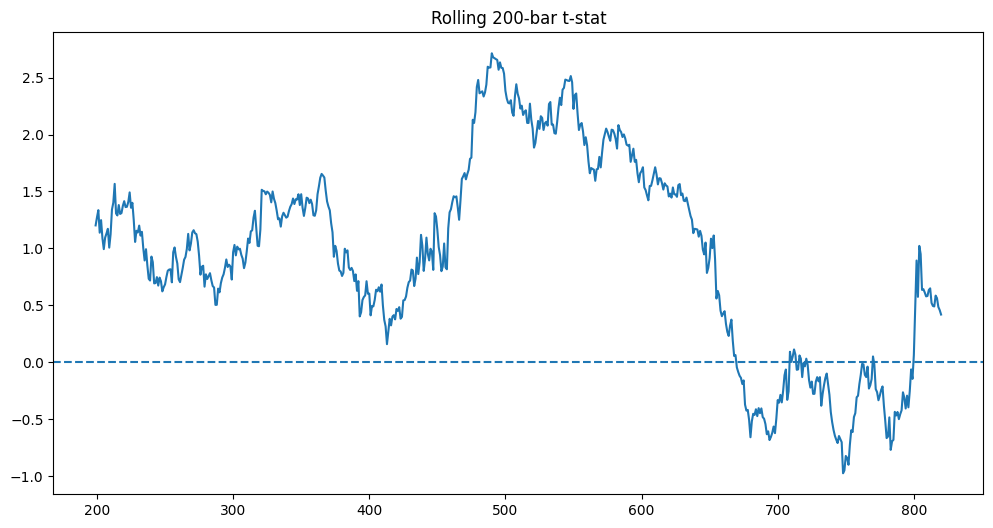

In [25]:
import pandas as pd

r_series = pd.Series(r)

rolling_t = (
    r_series.rolling(200)
    .apply(lambda x: x.mean() / (x.std(ddof=1) / np.sqrt(len(x))), raw=False)
)

plt.figure(figsize=(12,6))
plt.plot(rolling_t)
plt.axhline(0, linestyle='--')
plt.title("Rolling 200-bar t-stat")
plt.show()

📈 Rolling 200-Bar t-Statistic (Net Returns)

To assess whether the strategy’s edge is stable over time, we compute a rolling 200-bar t-statistic of the net log returns:

$$
t_{roll}(t) = \frac{\bar{r}{t-199:t}}{s{t-199:t} / \sqrt{200}}
$$

Where:
	•	$ \bar{r}_{t-199:t} $ = mean net log return over the last 200 bars
	•	$ s_{t-199:t} $ = standard deviation over the same window
	•	$ 200 $ = rolling window length

This measures local statistical significance, not just full-sample performance.

⸻

🎯 Why This Matters

The full-sample t-stat assumes:

$$
\mathbb{E}[r_t] = \mu \quad \text{is constant over time}
$$

But financial markets are rarely stationary.
Edges tend to be regime-dependent and time-varying.

The rolling t-stat answers a more realistic question:

“If I had only seen the last 200 bars at any point in time, would I believe this strategy has predictive power?”

⸻

🔎 What the Plot Shows

From the rolling t-stat:
	•	Extended periods where
$$
t_{roll} > 2
$$
→ Strong local statistical significance
	•	Periods where
$$
t_{roll} \approx 0
$$
→ No clear edge
	•	Some windows where
$$
t_{roll} < 0
$$
→ Temporary underperformance

This indicates the strategy is not uniformly strong across time, but rather:
	•	Persistent overall
	•	Fluctuating in strength
	•	Likely regime-sensitive

⸻

🧠 Important Interpretation

A positive full-sample t-stat (e.g., $t \approx 1.95$ net) does not imply consistent profitability.

The rolling analysis shows:
	•	The edge is distributed across time, not concentrated in a single short burst.
	•	There is no single isolated spike responsible for all performance.
	•	Performance weakens mid-sample but later partially recovers.

This is a healthier structure than a strategy whose entire Sharpe comes from one short lucky period.

⸻

📌 Takeaway

We are not just asking:

“Does this strategy make money?”

We are asking:

“Does this strategy exhibit persistent statistical structure over time?”

The rolling t-stat suggests:
	•	There is signal
	•	It is time-varying
	•	It is not purely random
	•	But it is not perfectly stable either

Which is exactly what we expect in real markets.

In [26]:
r = model_trades["trade_log_return_net_taker"].to_numpy()

mid = len(r)//2

r1 = r[:mid]
r2 = r[mid:]

def compute_t(x):
    return x.mean() / (x.std(ddof=1) / np.sqrt(len(x)))

print("First half t:", compute_t(r1))
print("Second half t:", compute_t(r2))

First half t: 1.3162864133664136
Second half t: 1.4442034523986105


To verify whether the strategy’s performance is concentrated in a specific subperiod, we split the net returns into two equal halves:
	•	First half: $r_1$
	•	Second half: $r_2$

For each subsample, we compute the t-statistic:

$$
t = \frac{\bar{r}}{s / \sqrt{N}}
$$

Where:
	•	$\bar{r}$ = mean net log return
	•	$s$ = sample standard deviation
	•	$N$ = number of observations

📊 Results
	•	First half t-stat: 1.32
	•	Second half t-stat: 1.44

⸻

🎯 Interpretation

If the strategy’s edge were driven by a single lucky regime, we would expect something like:
	•	Strong t-stat in one half
	•	Near-zero or negative t-stat in the other

Instead, both halves show moderately positive and similar t-statistics.

This suggests:
	•	The signal is not concentrated in one specific time window
	•	Performance is relatively distributed across the sample
	•	The edge is not purely regime-isolated

⸻

🧠 What This Means

While neither half individually shows very strong statistical significance, the fact that both halves remain positive indicates:
	•	Temporal consistency
	•	No obvious structural breakdown between early and late periods
	•	A more stable behavior than a regime-only strategy

This strengthens the case that the observed performance is not purely the result of one favorable market phase.

In [27]:
r = model_trades["trade_log_return_net_taker"].to_numpy()
signal = model_trades["position"].to_numpy()

np.random.seed(42)
signal_shuffled = np.random.permutation(signal)

r_fake = signal_shuffled * model_trades["trade_log_return"].to_numpy()

compute_t(r_fake)

np.float64(0.44402134923920655)

🔀 Shuffled Signal Test (Random Alignment Diagnostic)

To verify that the strategy’s performance comes from predictive structure, and not from unconditional drift in returns, we perform a shuffled signal test.

We randomly permute the trading signals while keeping the realized returns unchanged:

$$
r^{fake}_t = \tilde{s}_t \cdot r_t
$$

Where:
	•	$\tilde{s}_t$ = randomly permuted signal
	•	$r_t$ = realized log return

We then compute the t-statistic of the shuffled strategy.

📊 Result

Shuffled t-stat:

$$
t_{shuffled} \approx 0.44
$$

⸻

🎯 Interpretation

If the strategy’s performance were due to:
	•	A structural upward drift in returns
	•	A bias in long exposure
	•	Or pure randomness

Then shuffling the signals would not significantly reduce the t-stat.

However, we observe:

$$
t_{original} \approx 1.95
$$

vs.

$$
t_{shuffled} \approx 0.44
$$

This indicates that:
	•	The alignment between signals and future returns matters.
	•	Predictive structure is present.
	•	The edge is not merely coming from unconditional mean returns.

⸻

🧠 Why This Test Is Important

The t-statistic depends only on:

$$
t = \frac{\bar{r}}{s / \sqrt{N}}
$$

It does not account for temporal ordering.

By shuffling the signals, we destroy any systematic alignment between predictions and outcomes.

Since the t-stat collapses toward zero, this supports the hypothesis that:

The model is capturing real, though weak, predictive information.

⸻

📌 Takeaway

The shuffled signal test acts as a basic but powerful robustness check:
	•	If performance survives shuffling → likely random
	•	If performance disappears after shuffling → signal alignment matters

In our case, the edge weakens substantially under randomization, suggesting the strategy is not purely noise.

### RECAP

At this stage, we have performed multiple structural validation checks on the strategy.

1️⃣ Full-Sample Performance

Net performance:
	•	$t \approx 1.95$
	•	Sharpe ≈ 2.25
	•	Positive mean net return after taker fees

This suggests the presence of statistical edge in the full out-of-sample period.

However, a single full-sample t-stat is not sufficient to claim robustness.

⸻

2️⃣ Rolling 200-Bar t-Statistic

We computed:

$$
t_{roll}(t) = \frac{\bar{r}{t-199:t}}{s{t-199:t} / \sqrt{200}}
$$

This revealed:
	•	Extended periods of local significance ($t > 2$)
	•	Periods of weaker performance
	•	No single isolated spike dominating the entire result

Interpretation:

The edge is time-varying but persistent, not concentrated in one short lucky window.

⸻

3️⃣ Subsample Stability (Half-Split Test)

We split the net returns into two equal halves and computed:
	•	First half: $t \approx 1.32$
	•	Second half: $t \approx 1.44$

This indicates:
	•	Performance is distributed across time
	•	No obvious structural collapse in the later period
	•	The edge is not driven by one regime only

⸻

4️⃣ Shuffled Signal Test

We randomized signal alignment:

$$
r^{fake}_t = \tilde{s}_t \cdot r_t
$$

Result:

$$
t_{shuffled} \approx 0.44
$$

Since:

$$
t_{original} \gg t_{shuffled}
$$

This suggests:
	•	Predictive alignment matters
	•	The edge is not purely unconditional drift
	•	There is real (though weak) predictive structure

⸻

📌 What Has Been Validated

So far, we have evidence that:
	•	The strategy has positive net expectancy
	•	The edge is not concentrated in one short regime
	•	Signal alignment contributes meaningfully
	•	Performance survives realistic taker fees

⸻

⚠ What Has NOT Been Validated Yet

We have not yet tested:
	•	Stability under rolling retraining
	•	Parameter sensitivity across time
	•	Structural decay under walk-forward evaluation
	•	Out-of-sample performance under multiple re-optimizations

Currently, the model has been trained once and evaluated once.

That is not sufficient for deployment-level confidence.

⸻

🎯 Logical Next Step

The correct next research step is:

Rolling walk-forward validation

This will answer:

If the model were retrained through time, would the edge persist?

Only after that test can we assess whether this is:
	•	A transient in-sample artifact
	•	Or a structurally adaptive signal